In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt

In [3]:

img = cv2.imread('dataset/evanna_lynch/ia_1300000075.jpg')
img.shape


(225, 225, 3)

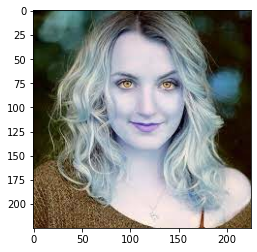

In [4]:
plt.imshow(img)

In [5]:
face_cascade = cv2.CascadeClassifier('haarcascade/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade/haarcascade_eye.xml')
#nose_cascade = cv2.CascadeClassifier('haarcascade/nose.xml')
mouth_cascade = cv2.CascadeClassifier('haarcascade/haarcascade_mcs_mouth.xml')

In [6]:
faces = face_cascade.detectMultiScale(img, 1.3, 5)

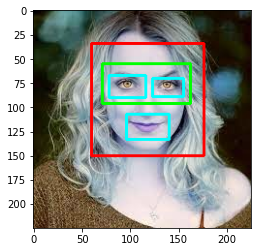

In [7]:
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi)
    #nose = nose_cascade.detectMultiScale(roi)
    mouth = mouth_cascade.detectMultiScale(roi)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    #for (nx,ny,nw,nh) in nose:
        #cv2.rectangle(roi,(nx,ny),(nx+nw,ny+nh),(0,0,255),2)
    for (mx,my,mw,mh) in mouth:
        cv2.rectangle(roi,(mx,my),(mx+mw,my+mh),(0,255,255),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

In [8]:
def detect(img):
    plt.imshow(img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    for (x,y,w,h) in faces:
        face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi = gray[y:y+h, x:x+w]
        roi_color = face_img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi)
        #nose = nose_cascade.detectMultiScale(roi)
        mouth = mouth_cascade.detectMultiScale(roi)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        #for (nx,ny,nw,nh) in nose:
            #cv2.rectangle(roi_color,(nx,ny),(nx+nw,ny+nh),(0,0,255),2)
        for (mx,my,mw,mh) in mouth:
            cv2.rectangle(roi_color,(mx,my),(mx+mw,my+mh),(0,255,255),2)
        

        plt.figure()
        h=plt.imshow(face_img, cmap='gray')
        return plt.show(h)
    

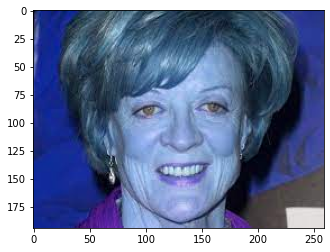

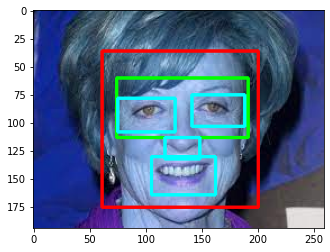

In [9]:
detect(cv2.imread('dataset/maggie_smith/ia_900000068.jpg'))

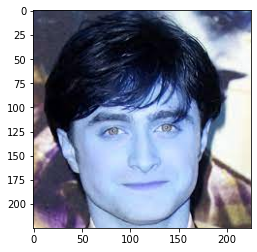

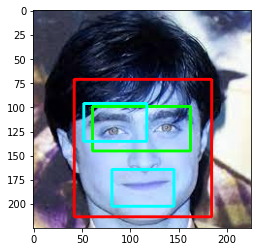

In [10]:
detect(cv2.imread('dataset/daniel_radcliffe/ia_100000082.jpg'))

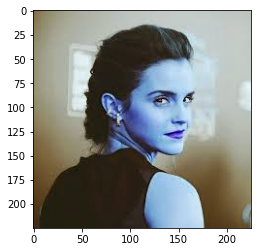

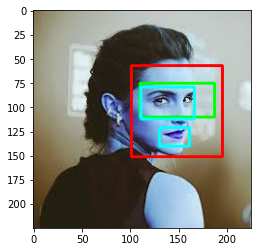

In [11]:
detect(cv2.imread('dataset/emma_watson/ia_500001767.jpg'))

In [12]:
cropped_img = np.array(roi)
cropped_img.shape

(116, 116, 3)

In [26]:
import pywt
   
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

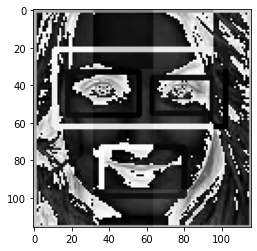

In [27]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [33]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    for (x,y,w,h) in faces:
        roi = img[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi)
        if len(eyes) >= 1:
            return roi_color
    

In [34]:
path_to_data = "dataset/"
path_to_cropped_data = "dataset/cropped/"

In [35]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [36]:
import shutil
if os.path.exists(path_to_cropped_data):
     shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)

In [37]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cropped_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  dataset/cropped/alan_rickman
Generating cropped images in folder:  dataset/cropped/daniel_radcliffe
Generating cropped images in folder:  dataset/cropped/emma_watson
Generating cropped images in folder:  dataset/cropped/evanna_lynch
Generating cropped images in folder:  dataset/cropped/maggie_smith
Generating cropped images in folder:  dataset/cropped/ruper_grint


In [38]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list

In [39]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'alan_rickman': 0,
 'daniel_radcliffe': 1,
 'emma_watson': 2,
 'evanna_lynch': 3,
 'maggie_smith': 4,
 'ruper_grint': 5}

In [40]:
x, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

len(X[0])=4096,(32 * 32 * 3 + 32 * 32=4096)

In [41]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(236, 4096)

In [42]:

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.6949152542372882

In [44]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.53      0.91      0.67        11
           1       0.60      0.50      0.55         6
           2       0.79      0.75      0.77        20
           3       0.78      0.64      0.70        11
           4       1.00      0.20      0.33         5
           5       0.83      0.83      0.83         6

    accuracy                           0.69        59
   macro avg       0.75      0.64      0.64        59
weighted avg       0.74      0.69      0.68        59



In [45]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [46]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [47]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.677778,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.496825,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.706349,{'logisticregression__C': 1}


In [48]:
best_estimators['svm'].score(x_test,y_test)

0.6949152542372882

In [49]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.7627118644067796

In [50]:
best_clf = best_estimators['logistic_regression']

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))

Text(69.0, 0.5, 'Truth')

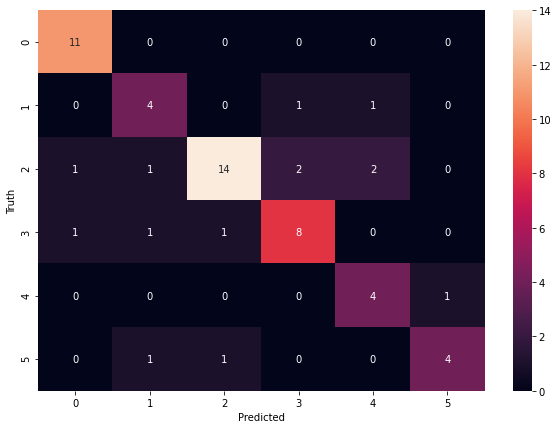

In [52]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
class_dict

{'alan_rickman': 0,
 'daniel_radcliffe': 1,
 'emma_watson': 2,
 'evanna_lynch': 3,
 'maggie_smith': 4,
 'ruper_grint': 5}

In [54]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']